### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [433]:
import pandas as pd

In [434]:
data=pd.read_csv('/home/abylaihan/Загрузки/lab2/data.csv')
data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [435]:
f = open('/home/abylaihan/Загрузки/lab2/Data_Dictionary.txt', 'r')
while True:
    line = f.readline()
    if line == '':
        break
    print(line)
f.close()

Field Name				Definition

RefID				        Unique (sequential) number assigned to vehicles

IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 

PurchDate				The Date the vehicle was Purchased at Auction

Auction					Auction provider at which the  vehicle was purchased

VehYear					The manufacturer's year of the vehicle

VehicleAge				The Years elapsed since the manufacturer's year

Make					Vehicle Manufacturer 

Model					Vehicle Model

Trim					Vehicle Trim Level

SubModel				Vehicle Submodel

Color					Vehicle Color

Transmission				Vehicles transmission type (Automatic, Manual)

WheelTypeID				The type id of the vehicle wheel

WheelType				The vehicle wheel type description (Alloy, Covers)

VehOdo					The vehicles odometer reading

Nationality				The Manufacturer's country

Size					The size category of the vehicle (Compact, SUV, etc.)

TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers

MMRAcquisitionAuctionAve

## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [436]:
%matplotlib inline
import matplotlib.pyplot as plt

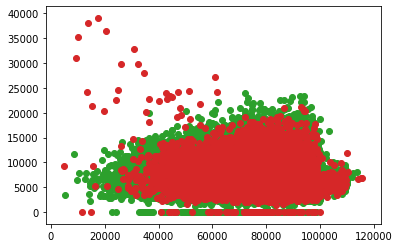

In [437]:
plt.scatter(data.loc[data['IsBadBuy'] == 0,'VehOdo'], data.loc[data['IsBadBuy'] == 0,'MMRCurrentRetailAveragePrice'], c='tab:green')
plt.scatter(data.loc[data['IsBadBuy'] == 1,'VehOdo'], data.loc[data['IsBadBuy'] == 1,'MMRCurrentRetailAveragePrice'], c='tab:red')

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [438]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car_data=data[['VehicleAge','Transmission','Make','WheelTypeID','VehOdo','Nationality','Size','IsBadBuy','MMRAcquisitionAuctionAveragePrice','MMRCurrentAuctionAveragePrice']]
car_data=car_data.dropna()
car_data.loc[car_data['Transmission']=='AUTO', 'Transmission'] =1
car_data.loc[car_data['Transmission']=='MANUAL', 'Transmission'] =0
car_data.loc[car_data['Transmission']=='Manual', 'Transmission'] =0
le.fit(car_data.Nationality)
car_data['Nationality']=le.transform(car_data.Nationality)
le.fit(car_data.Make)
car_data['Make']=le.transform(car_data.Make)
le.fit(car_data.Size)
car_data['Size']=le.transform(car_data.Size)
y=car_data[['IsBadBuy']]
car_data=car_data.drop(['IsBadBuy'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(car_data, y,train_size=0.9,random_state=42)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [439]:
y_pred=model.predict(x_test)

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [440]:
y_pred = (y_pred > 0.15) * 1
y_pred[10:30]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]])

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [441]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      6260
           1       0.19      0.31      0.23       690

    accuracy                           0.80      6950
   macro avg       0.55      0.58      0.56      6950
weighted avg       0.85      0.80      0.82      6950

[[5334  926]
 [ 476  214]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [442]:
model_tree = tree.DecisionTreeClassifier(max_depth=20)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [443]:
y_pred = model_tree.predict_proba(x_test)

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [444]:
y_pred = y_pred.argmax(axis=1)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6260
           1       0.16      0.10      0.13       690

    accuracy                           0.86      6950
   macro avg       0.53      0.52      0.52      6950
weighted avg       0.83      0.86      0.84      6950



# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [445]:
dataTrain = x_train
dataTest = x_test

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [446]:
mod = tree.DecisionTreeClassifier(max_depth=20)
mod.fit(dataTrain, y_train)
metrics.accuracy_score(y_test, mod.predict(dataTest))

0.8602877697841727

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [447]:
mod_tree = tree.DecisionTreeClassifier(max_depth=20)
mod_tree.fit(x_train, y_train)
y_pred = mod_tree.predict(x_test)
Y_test=y_test.to_numpy()
Y_train=y_train.to_numpy()
print(np.array([1000 if Y_test[i] == 0 else 100 for i in range(len(Y_test)) if Y_test[i] != y_pred[i]]).mean())

440.8817635270541


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [448]:
predictionProb = model_tree.predict_proba(x_test)
print(np.array([0 if predictionProb[i][0] > 0.5 else 1 for i in range(predictionProb.shape[0])]))

[0 0 0 ... 0 0 0]
